In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tqdm import tqdm

from uncertain_object import UncertainObject
from utils import generator

In [16]:
num_objects = 60
total_tests = int(num_objects * (num_objects - 1) / 2)
threshold = 0.1
dims = np.array(list(range(1, 8)), dtype=int)
dims = np.power(2, dims)

results = np.zeros((3, dims.size, total_tests), dtype=int)

for dim_idx in range(dims.size):

    dim = dims[dim_idx]

    objects = []

    means = np.random.uniform(-10, 10, (num_objects, dim))
    stds = np.random.uniform(1, 5, (num_objects, dim))

    # compute distance matrix of means
    distance_matrix = np.linalg.norm(means[:, None, :] - means[None, :, :], axis=-1)

    epsilon = np.quantile(distance_matrix.flatten(), threshold)

    for i in range(num_objects):
        mean = means[i]
        std = stds[i]
        num_samples = np.random.randint(10, 30, 1)

        tri = []
        gau = []
        uni = []
        for d in range(dim):
            if d % 3 == 0:
                tri.append((d, mean[d] - std[d], mean[d] + std[d]))
            elif d % 3 == 1:
                gau.append((d, mean[d], std[d]))
            else:
                uni.append((d, mean[d] - std[d], mean[d] + std[d]))

        objects.append(UncertainObject(generator(num_samples, tri, gau, uni)))

    for idx, (i, j) in enumerate(tqdm(combinations(objects, 2), total=total_tests)):
        results[0, dim_idx, idx] = i.ej(j, epsilon)
        results[1, dim_idx, idx] = i.iej(j, epsilon)
        results[2, dim_idx, idx] = i.o_iej(j, epsilon)

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

  0%|          | 0/1770 [00:00<?, ?it/s]

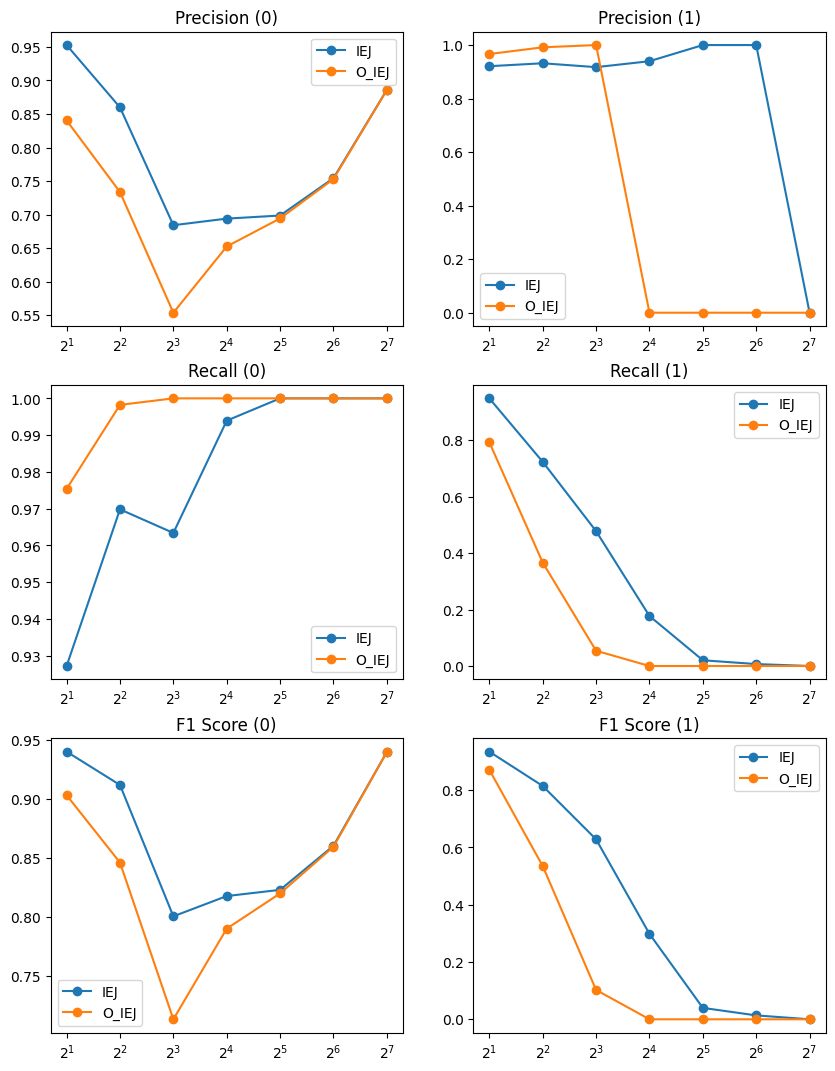

In [20]:
precision = np.zeros((4, dims.size))
recall = np.zeros((4, dims.size))
f1_score = np.zeros((4, dims.size))

for k in range(dims.size):
    iej = classification_report(results[0, k], results[1, k], output_dict=True, zero_division=0.0)
    oiej = classification_report(results[0, k], results[2, k], output_dict=True, zero_division=0.0)

    precision[0, k] = iej['0']['precision']
    recall[0, k] = iej['0']['recall']
    f1_score[0, k] = iej['0']['f1-score']

    precision[1, k] = oiej['0']['precision']
    recall[1, k] = oiej['0']['recall']
    f1_score[1, k] = oiej['0']['f1-score']
    
    precision[2, k] = iej['1']['precision']
    recall[2, k] = iej['1']['recall']
    f1_score[2, k] = iej['1']['f1-score']

    precision[3, k] = oiej['1']['precision']
    recall[3, k] = oiej['1']['recall']
    f1_score[3, k] = oiej['1']['f1-score']

fig, axs = plt.subplots(3, 2, figsize=(10, 13))

axs[0][0].plot(dims, precision[0], label='IEJ', marker='o')
axs[0][0].plot(dims, precision[1], label='O_IEJ', marker='o')
axs[0][0].set_title('Precision (0)')
axs[0][0].set_xscale('log', base=2)
axs[0][0].legend()

axs[1][0].plot(dims, recall[0], label='IEJ', marker='o')
axs[1][0].plot(dims, recall[1], label='O_IEJ', marker='o')
axs[1][0].set_title('Recall (0)')
axs[1][0].set_xscale('log', base=2)
axs[1][0].legend()

axs[2][0].plot(dims, f1_score[0], label='IEJ', marker='o')
axs[2][0].plot(dims, f1_score[1], label='O_IEJ', marker='o')
axs[2][0].set_title('F1 Score (0)')
axs[2][0].set_xscale('log', base=2)
axs[2][0].legend()

axs[0][1].plot(dims, precision[2], label='IEJ', marker='o')
axs[0][1].plot(dims, precision[3], label='O_IEJ', marker='o')
axs[0][1].set_title('Precision (1)')
axs[0][1].set_xscale('log', base=2)
axs[0][1].legend()

axs[1][1].plot(dims, recall[2], label='IEJ', marker='o')
axs[1][1].plot(dims, recall[3], label='O_IEJ', marker='o')
axs[1][1].set_title('Recall (1)')
axs[1][1].set_xscale('log', base=2)
axs[1][1].legend()

axs[2][1].plot(dims, f1_score[2], label='IEJ', marker='o')
axs[2][1].plot(dims, f1_score[3], label='O_IEJ', marker='o')
axs[2][1].set_title('F1 Score (1)')
axs[2][1].set_xscale('log', base=2)
axs[2][1].legend()